Import packages

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import requests
from io import StringIO

locate the data

In [65]:
with open("Faults27x7_var", "r") as file:
    headers = [line.strip() for line in file.readlines()]

df = pd.read_csv("Faults.NNA", delimiter="\t", names=headers, header=None)

print(df.head()) #access the downloaded data and put headers file together with the data file

fault_types = headers[-7:]
print(fault_types)  #Show the faults in the data

   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
0                    108  ...             0.8182           -0.2913   
1                    123  ...             

Display the data/the faults

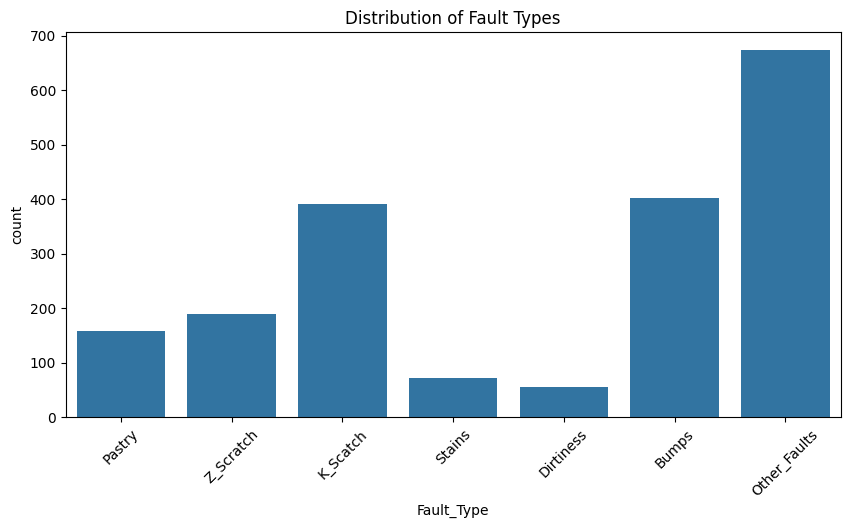

+--------------+-------+----------+-----------+--------+--------+-----------+
| Other_Faults | Bumps | K_Scatch | Z_Scratch | Pastry | Stains | Dirtiness |
+--------------+-------+----------+-----------+--------+--------+-----------+
|     673      |  402  |   391    |    190    |  158   |   72   |     55    |
+--------------+-------+----------+-----------+--------+--------+-----------+


In [66]:
df['Fault_Type'] = df[fault_types].idxmax(axis=1)

plt.figure(figsize=(10, 5))
sns.countplot(x='Fault_Type', data=df)
plt.title('Distribution of Fault Types')
plt.xticks(rotation=45)
plt.show()

counts = df['Fault_Type'].value_counts()

table = PrettyTable()

for fault in counts.index:
    table.add_column(fault, [counts[fault]])

print(table)

Preprocessing the data for binary sorting

Binary_Faults
1    1268
0     673
Name: count, dtype: int64
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       257

    accuracy                           1.00       389
   macro avg       1.00      1.00      1.00       389
weighted avg       1.00      1.00      1.00       389



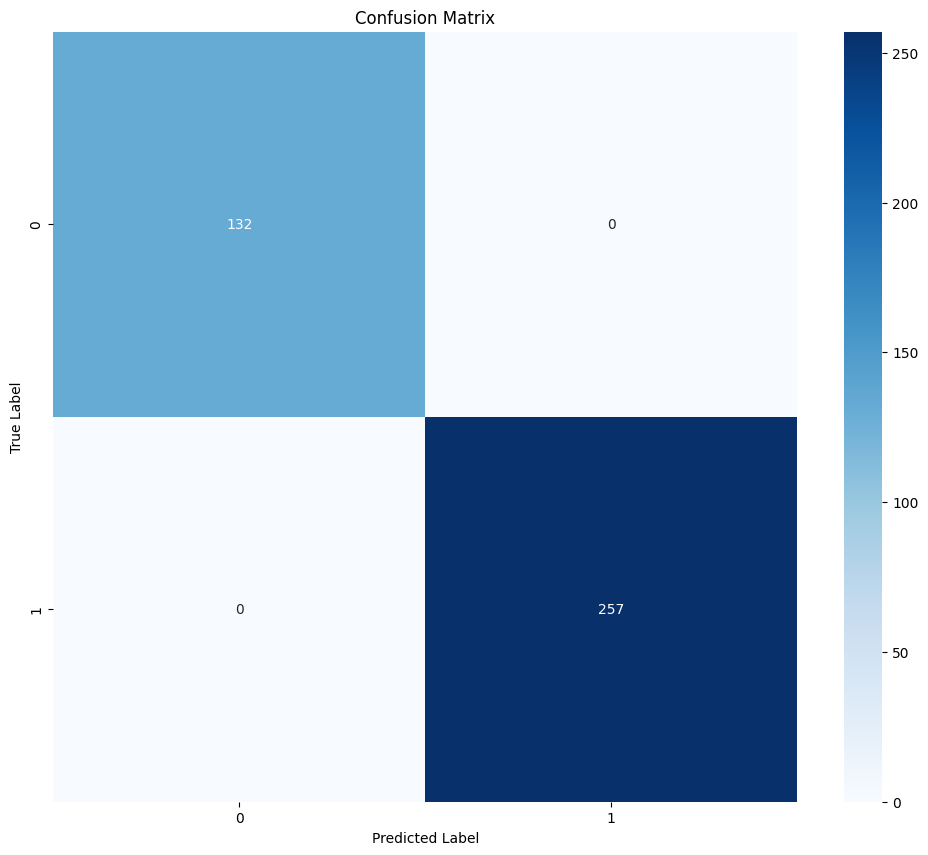

In [ ]:
#sorting between the 'others faults' and the faults in classes
known = ['Pastry', 'Z_Scratch', 'K_Scatch','Stains', 'Dirtiness', 'Bumps'] #1
unknown = [ 'Other_Faults'] #0
df['Binary_Faults'] = df['Fault_Type'].apply(lambda x: 1 if x in known else 0)

print(df['Binary_Faults'].value_counts())

X = df.drop(['Binary_Faults', 'Fault_Type']+ fault_types, axis=1)
y = df['Binary_Faults']

# Scaling the features for the model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=111)

#building the SVM model with polynomial kernel
poly_kernel_svm =SVC(kernel='poly', degree=3, C=1.0, random_state=111)
poly_kernel_svm.fit(X_train, y_train)

# Model Evaluation
y_pred = poly_kernel_svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

